In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import ceil
import matplotlib.pyplot as plt

In [2]:
#1. initialize the example data
"""
features: area, number of rooms, number of floors, age of the house
target: house price


x_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [1534, 3, 2, 30],
                    [852, 2, 1, 36],
                    [1800, 3, 2, 20]], dtype = np.float64)

y_target = np.array([460, 232, 315, 178, 350])


"""

# Set a random seed for reproducibility
np.random.seed(72)

# Generate 300 data points
m = 300

# Generate features with some randomness
sq_ft = np.random.uniform(800, 3500, m)
bedrooms = np.random.randint(2, 6, m)
floors = np.random.randint(1, 4, m)
age = np.random.uniform(5, 70, m)

# Create the feature matrix X
X = np.stack([sq_ft, bedrooms, floors, age], axis=1)

# Generate a target vector y with some linear relationship and added noise
# Formula: price = 0.15*sq_ft + 15*bedrooms + 10*floors - 3*age + b + noise
true_w = np.array([0.15, 15, 10, -3])
true_b = 50
noise = np.random.normal(0, 10, m) # Added Gaussian noise for realism

y = X @ true_w + true_b + noise

# Print the shapes to confirm
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


# Split the data into training and testing sets
# test_size=30: specifies that 30 samples should be used for the test set
# random_state=36: ensures the same random split every time
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=72)

# Print the shapes to verify the split
print("Shapes after splitting:")
print(f"x_train shape: {x_train.shape}")
# Output: X_train shape: (270, 4)
print(f"y_train shape: {y_train.shape}")
# Output: y_train shape: (270,)
print(f"x_test shape: {x_test.shape}")
# Output: X_test shape: (30, 4)
print(f"y_test shape: {y_test.shape}")
# Output: y_test shape: (30,)

Shape of X: (300, 4)
Shape of y: (300,)
Shapes after splitting:
x_train shape: (270, 4)
y_train shape: (270,)
x_test shape: (30, 4)
y_test shape: (30,)


In [3]:
#2. initialize weight vector and b
w_i = np.zeros(x_train.shape[1])
b_i = 0.0 
print(w_i)

[0. 0. 0. 0.]


In [4]:
#normalize the dataset
a = np.mean(x_train, axis = 0)
s = np.std(x_train, axis = 0)
x_train_norm = (x_train - a) / s
x_test_norm = (x_test - a) / s
#print(x_train_norm)
#print(x_test_norm)

In [5]:
#3. compute the cost
def compute_cost(x, y, w, b):
    y_pre = np.dot(x, w) + b
    #print(y_pre)
    #print(y_pre.shape)
    m = y_pre.shape[0]
    cost = np.sum((y_pre - y)**2) / (2 * m)
    return cost
        


In [6]:
#c = compute_cost(x_train_norm, y_train, w_i, b_i)
#print(c)

In [7]:
#4. compute the gradient
"""
cost = np.sum((y_pre - y)**2) / (2 * m)
gradient
dj_dw = 

"""

def compute_gradient(x, y, w, b):
    y_pre = np.dot(x, w) + b
    errors = y_pre - y
    #print(y_pre)
    #print(errors)
    m = y_pre.shape[0]
    dj_dw = (x.T @ errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db
    

In [14]:
#5. excute gradient descent
def gradient_descent(x, y, w, b, compute_cost, compute_gradient):
    w_e = w.copy()
    b_e = b
    listcost = []
    iteration = 100000
    alpha = 0.001
    prev = None
    tol = 1e-6
    for num in range(iteration):
        #currentprediction = x @ w_e + b_e
        currentcost = compute_cost(x, y, w_e, b_e)
        listcost.append(currentcost)
        if num % ceil(iteration / 100) == 0:
            #print(f"current prediction is {currentprediction}")
            print(f"At step {num} current cost is: {listcost[-1]}")
        if prev is not None and abs(prev - currentcost) <= tol:
            break

        prev = currentcost
        gradient_w, gradient_b = compute_gradient(x, y, w_e, b_e)
        w_e = w_e - alpha * gradient_w
        b_e = b_e - alpha * gradient_b

    return listcost, w_e, b_e
        

In [15]:
#6. run the train process
cost_history, w_final, b_final = gradient_descent(x_train_norm, y_train, w_i, b_i, compute_cost, compute_gradient)
#print(f"final list of cost is: {listofcost}")

print(f"final w and b are: {w_final}, {b_final}")

At step 0 current cost is: 64932.973754309365
At step 1000 current cost is: 8774.44562633823
At step 2000 current cost is: 1233.1002200068876
At step 3000 current cost is: 217.6921514292938
At step 4000 current cost is: 80.5914655543379
At step 5000 current cost is: 62.02550839205977
At step 6000 current cost is: 59.50336308439627
At step 7000 current cost is: 59.1595512222072
At step 8000 current cost is: 59.112505474361654
At step 9000 current cost is: 59.10604078468694
final w and b are: [118.6113452   16.18415635   7.81144096 -55.69931479], 334.3965068791059


In [16]:
#7. convert w and b to true space
w_final_ori = w_final / s
b_final_ori = b_final - (w_final_ori @ a)
print(f"final w and b in the true space are: {w_final_ori}, {b_final_ori}")
finalprediction = x_train @ w_final_ori + b_final_ori
finalerrors = finalprediction - y_train
#finalcost = compute_cost(x_train, y_train, w_final_ori, b_final_ori)
#print(f"final prediction is: {finalprediction} with length of {len(finalprediction)}")
#print(f"final cost in the true space is: {finalcost}")

final w and b in the true space are: [ 0.15174398 14.62960012 10.02692408 -2.98302456], 46.52211492893457


<function matplotlib.pyplot.show(close=None, block=None)>

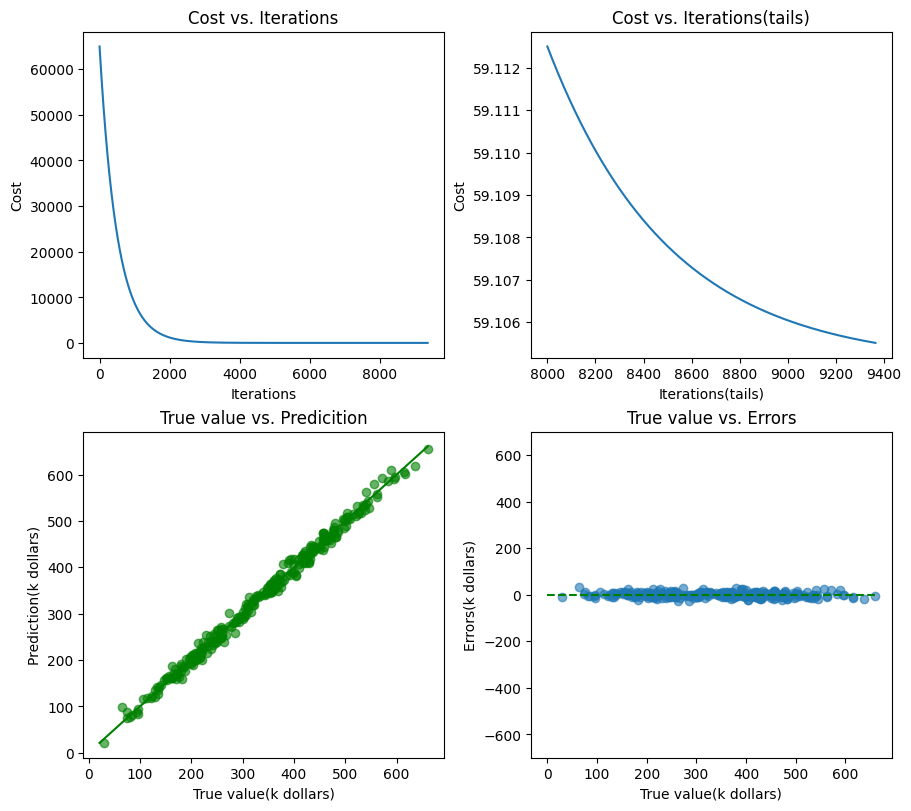

In [17]:
#8. plot the cost curve to monitor the training
fig, ax = plt.subplots(2, 2, constrained_layout = True, figsize = (9, 8))
ax[0, 0].plot(cost_history)
ax[0, 0].set_title("Cost vs. Iterations")
ax[0, 0].set_xlabel("Iterations")
ax[0, 0].set_ylabel("Cost")

ax[0, 1].plot(np.arange(8000, len(cost_history)), cost_history[8000:])
ax[0, 1].set_title("Cost vs. Iterations(tails)")
ax[0, 1].set_xlabel("Iterations(tails)")
ax[0, 1].set_ylabel("Cost")

ax[1, 0].scatter(y_train, finalprediction, alpha = 0.6, c = "g")
ax[1, 0].set_title("True value vs. Predicition")
ax[1, 0].set_xlabel("True value(k dollars)")
ax[1, 0].set_ylabel("Prediction(k dollars)")
min_val = min(y_train.min(), finalprediction.min())
max_val = max(y_train.max(), finalprediction.max())
ax[1, 0].plot([min_val, max_val], [min_val, max_val], 'g-')


ax[1, 1].scatter(y_train, finalerrors, alpha = 0.6)
ax[1, 1].set_title("True value vs. Errors")
ax[1, 1].set_xlabel("True value(k dollars)")
ax[1, 1].set_ylabel("Errors(k dollars)")
ax[1, 1].set_ylim(-700, 700)
ax[1, 1].plot([0, y_train.max()], [0, 0], 'g--')


plt.show



In [18]:
#9. test the model on the test dataset and visualization
finaltestprediction = x_test @ w_final_ori + b_final_ori
finaltesterrors = finaltestprediction - y_test

<function matplotlib.pyplot.show(close=None, block=None)>

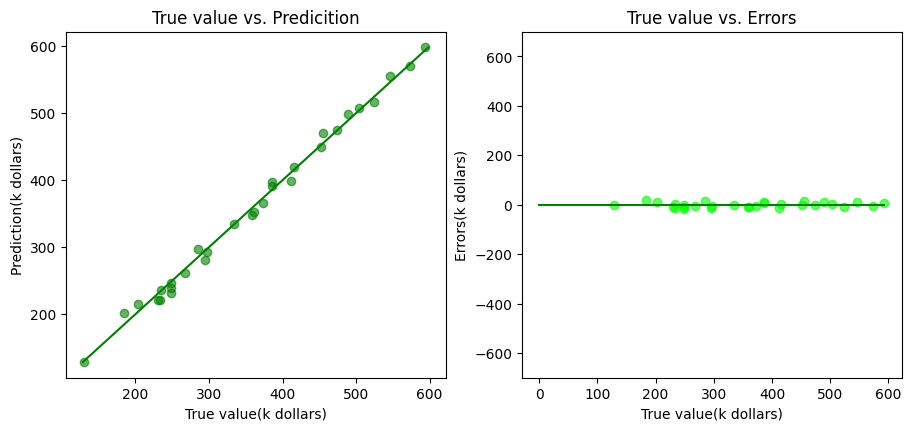

In [19]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (9, 4.2))


ax[0].scatter(y_test, finaltestprediction, alpha = 0.6, c = "g")
ax[0].set_title("True value vs. Predicition")
ax[0].set_xlabel("True value(k dollars)")
ax[0].set_ylabel("Prediction(k dollars)")
min_val = min(y_test.min(), finaltestprediction.min())
max_val = max(y_test.max(), finaltestprediction.max())
ax[0].plot([min_val, max_val], [min_val, max_val], 'g-')


ax[1].scatter(y_test, finaltesterrors, c = "lime", alpha = 0.6)
ax[1].set_title("True value vs. Errors")
ax[1].set_xlabel("True value(k dollars)")
ax[1].set_ylabel("Errors(k dollars)")
ax[1].set_ylim(-700, 700)
ax[1].plot([0, y_test.max()], [0, 0], 'g-')


plt.show

In [20]:
#10. evaluate MSE and R squre
mse = mean_squared_error(y_test, finaltestprediction)
print(f"Test MSE: {mse}")
r2 = r2_score(y_test, finaltestprediction)
print(f"Test R-squared: {r2}")

Test MSE: 86.29446623157666
Test R-squared: 0.9943026356259976
